In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
from functions import get_dyn_v2, get_prop_abs_v2, create_R_v1, get_var_hist,simulate_traj,get_prop_abs, create_R, get_theo_var_l, get_x2_var
from setup import setup_matplotlib
#from scipy.linalg import expm
#from scipy.sparse import csr_array, coo_array
from scipy.optimize import curve_fit
from pathlib import Path

setup_matplotlib()

np.random.seed(42)

In [3]:
k = 1

In [4]:
all_data = {}
for filepath in (Path.cwd()/'nummeric_results/').glob('cusp_rate_s*.pkl'):
    s = float(filepath.stem.split('cusp_rate_s')[1])
    all_data[s] = pickle.loads(open(filepath, 'rb').read())
s_s = np.sort(list(all_data.keys()))

all_abs = {}
for filepath in (Path.cwd()/'nummeric_results/').glob('cusp_abs_s*.pkl'):
    s = float(filepath.stem.split('cusp_abs_s')[1])
    all_abs[s] = pickle.loads(open(filepath, 'rb').read())
    
s_s_abs = np.sort(list(all_abs.keys()))
s_s = np.sort(list(all_data.keys()))

if ~np.all(np.abs(s_s_abs - s_s) < 1e-10):
    print('s_s in abs different form all_data')

In [5]:
st_data = pickle.loads(open('nummeric_results/shorttime_cusp_rate.pkl', 'rb').read())
st_abs_data = pickle.loads(open('nummeric_results/shorttime_cusp_abs.pkl', 'rb').read())

In [6]:
taus = np.unique([all_data[si]['ltaus'] for si in s_s], axis = 0)
taus_abs = np.unique([all_abs[si]['ltaus'] for si in s_s_abs], axis = 0)

if len(taus) > 1:
    print('One file with other ltaus !!')
else:
    taus = taus[0]
    
if ~np.all(np.abs(taus_abs - taus) < 1e-10):
    print('tau in abs different form al_data')
    
if ~np.all(np.abs(st_data['ltaus'] - taus) < 1e-10):
    print('tau in st different form al_data')
    
if ~np.all(np.abs(st_data['s_s'] - s_s) < 1e-10):
    print('s_s in st different form al_data')
    
if ~np.all(np.abs(st_abs_data['ltaus'] - taus) < 1e-10):
    print('tau in st abs different form al_data')
    
if ~np.all(np.abs(st_abs_data['s_s'] - s_s) < 1e-10):
    print('s_s in st abs different form al_data')

In [7]:
taus, s_s

(array([0.  , 0.05, 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.4 , 1.6 , 1.8 ,
        2.  ]),
 array([0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 ,
        0.75]))

[0.2]


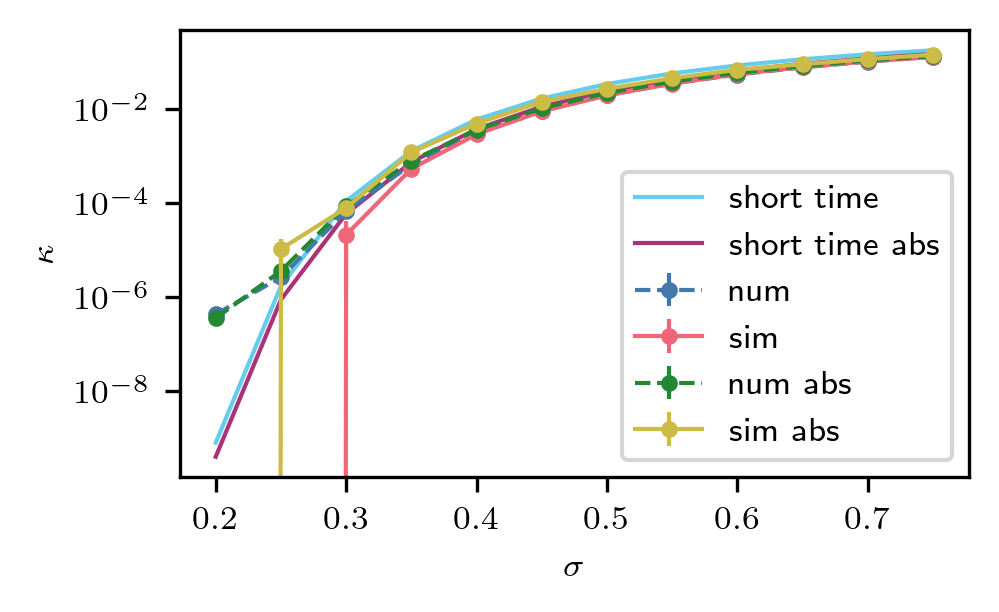

In [30]:
tau_is = [2]
print(taus[tau_is])
for tau_i  in tau_is:
    tau = taus[tau_i]
    num_rates = np.stack([all_data[i]['num_rates'][tau_i] for i in s_s])
    sim_rates = np.stack([all_data[i]['sim_rates'][tau_i] for i in s_s])
    
    num_abs = np.stack([all_abs[i]['num_rates'][tau_i] for i in s_s])
    sim_abs = np.stack([all_abs[i]['sim_rates'][tau_i] for i in s_s])

    plt.errorbar(s_s, *num_rates.T, ls = '--', marker='.', label = 'num')
    plt.errorbar(s_s, *sim_rates.T, marker='.', label = 'sim')
    
    plt.errorbar(s_s, *num_abs.T, ls = '--', marker='.', label = 'num abs')
    plt.errorbar(s_s, *sim_abs.T, marker='.', label = 'sim abs')
    
    plt.plot(s_s, st_data['st_rates'][:,tau_i,0], label = 'short time')
    plt.plot(s_s, st_abs_data['st_rates'][:,tau_i,0], label = 'short time abs')
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\kappa$')
plt.yscale('log')
plt.legend()
#plt.ylim(1e-4,0.5e0)
plt.tight_layout()

0.25


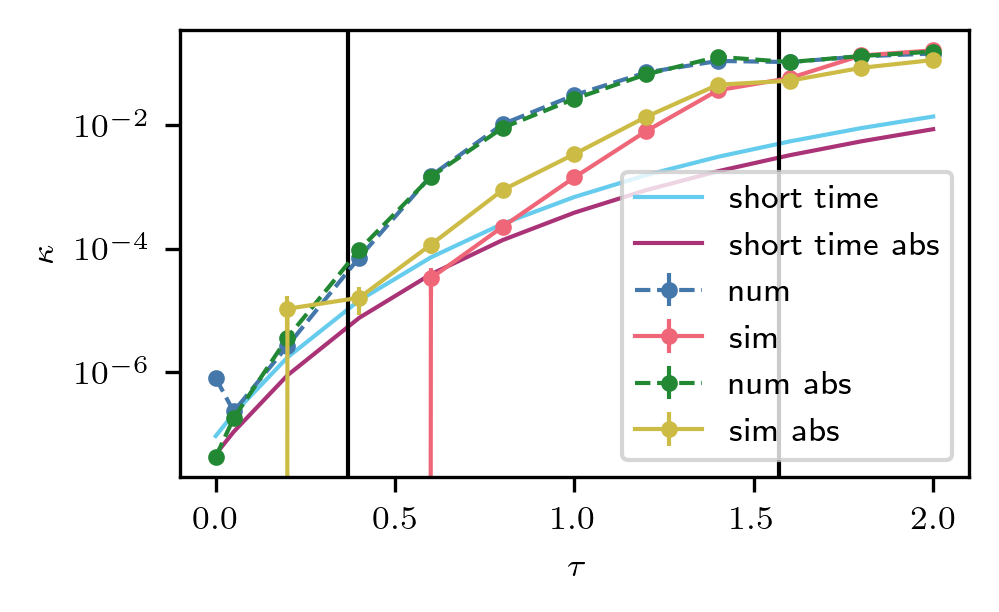

In [31]:
s_idx = 1
print(s_s[s_idx])
plt.errorbar(taus, *all_data[s_s[s_idx]]['num_rates'].T, marker = '.', ls = '--', label = 'num')
plt.errorbar(taus, *all_data[s_s[s_idx]]['sim_rates'].T, marker = '.', label = 'sim')

plt.errorbar(taus, *all_abs[s_s[s_idx]]['num_rates'].T, marker = '.', ls = '--', label = 'num abs')
plt.errorbar(taus, *all_abs[s_s[s_idx]]['sim_rates'].T, marker = '.', label = 'sim abs')

plt.plot(taus, st_data['st_rates'][s_idx,:,0], label = 'short time')
plt.plot(taus, st_abs_data['st_rates'][s_idx,:,0], label = 'short time abs')
plt.yscale('log')
plt.ylim(*plt.ylim())
plt.vlines([1/np.e /k, np.pi/2/k],*plt.ylim(), color='black')
# y = 4e-1
# plt.text(0.5*1/np.e /k,              y,'Regim I', ha='center', va='center')
# plt.text(0.5*(1/np.e /k+  np.pi/2/k),y,'Regim II',ha='center', va='center')
# plt.text(0.5*(np.pi/2/k + plt.xlim()[1]),            y,'Regim III',ha='center', va='center')


plt.xlabel(r'$\tau$')
plt.ylabel(r'$\kappa$')
plt.legend()
plt.tight_layout()

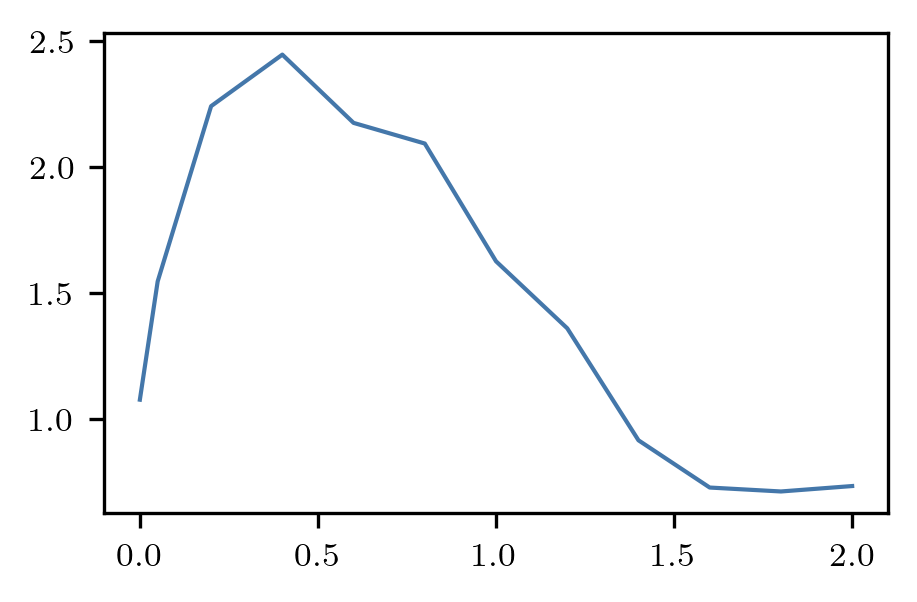

In [10]:
plt.plot(taus, all_abs[s_s[s_idx]]['sim_rates'][:,0] / all_data[s_s[s_idx]]['sim_rates'][:,0])